In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import os
import sys
import random
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette("muted")
random.seed(20241021)
np.random.seed(20241021)
torch.manual_seed(3407) # Torch.manual_seed(3407) is all you need. Paper: http://arxiv.org/abs/2109.08203

# 修改工作路径，使本.ipynb文件能够像在本文件夹根目录下一样导入其他模块
# Modify the working path so that this.ipynb file can import other modules like in the root directory
current_dir = os.path.dirname(os.path.abspath('__file__'))
sys.path.append(os.path.join(current_dir, '..'))

In [2]:
from models.RNN import RNN, LSTM, GRU
from models.CNN import CNN, TCN
from models.MLP import MLP
from models.transformer import Transformer, iTransformer, PatchTST, Reformer, Informer
from models.Linear import LLinear, DLinear, NLinear
from models.stat import Identical, ExponentialMovingAverage, SVR
from gas_data_prediction.utils import FitHistory

# Hyperparameters
num_epochs = 20
learning_rate = 0.001
input_len = 64
output_len = 16
label_len = 0 # label_len should be set only for decoder-based models, or there is potential risk of data leakage.
input_channels = 10
output_channels = 10
batch_size = 32
#device = 'cpu'  # 设备
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Instantiate models, loss functions, evaluation functions, and optimizers
# 实例化模型、损失函数、评估函数和优化器
MODEL = LSTM(
    input_len=input_len, output_len=output_len, input_channels=input_channels, output_channels=output_channels,
    ).to(device)
loss_func = nn.MSELoss()
metric_func=nn.L1Loss()
optimizer = optim.Adam(MODEL.parameters(), lr=learning_rate)
history=FitHistory()
print('Model parameters: ', sum(p.numel() for p in MODEL.parameters()))

Model parameters:  170144


In [3]:
import gas_data_prediction.data_preprocessing as dp

data_paths=["E:\\科创优才\\实验数据\\毕设实验数据\\Testo20240509.xlsx",
           "E:\\科创优才\\实验数据\\毕设实验数据\\testo20240511数据.xlsx",
           "E:\\科创优才\\实验数据\\毕设实验数据\\烟气数据20240514.xlsx",
           "E:\\科创优才\\实验数据\\毕设实验数据\\⁭烟气数据20240516.xlsx"]

var_names=['% O2', 'ppm CO', '% CO2', 'ppm NO', 'ppm NO2', '°C 烟温', 'ppm NOx', 'ppm SO2', '°C 环温', 'l/min 泵流量']

X, Y, X_grouped, Y_grouped, (var_mean, var_std_dev) = dp.get_XY(data_paths, input_len, output_len, label_len=label_len, var_names=var_names, use_filter=False)
train_loader, val_loader, test_loader = dp.get_XY_loaders(X, Y, batch_size=batch_size)

len(X_grouped): 4
len(Y_grouped): 4
X shape:  (1776, 64, 10)
Y shape:  (1776, 16, 10)
Train dataset size: X: (1243, 64, 10); Y: (1243, 16, 10)
Val dataset size: X: (177, 64, 10); Y: (177, 16, 10)
Test dataset size: X: (355, 64, 10); Y: (355, 16, 10)


  5%|▌         | 1/20 [00:00<00:14,  1.33it/s]

Epoch [ 1  /20], Time: 0.7544s, Loss: 0.2652, Metric: 0.1558, Val Loss: 0.4961, Val Metric: 0.1640


 15%|█▌        | 3/20 [00:01<00:05,  3.06it/s]

Epoch [ 2  /20], Time: 0.2223s, Loss: 0.2590, Metric: 0.1567, Val Loss: 0.4986, Val Metric: 0.1646
Epoch [ 3  /20], Time: 0.1890s, Loss: 0.2515, Metric: 0.1563, Val Loss: 0.4936, Val Metric: 0.1667


 25%|██▌       | 5/20 [00:01<00:03,  4.13it/s]

Epoch [ 4  /20], Time: 0.1992s, Loss: 0.2469, Metric: 0.1524, Val Loss: 0.4862, Val Metric: 0.1640
Epoch [ 5  /20], Time: 0.1799s, Loss: 0.2416, Metric: 0.1511, Val Loss: 0.5015, Val Metric: 0.1786


 35%|███▌      | 7/20 [00:01<00:02,  4.79it/s]

Epoch [ 6  /20], Time: 0.1815s, Loss: 0.2376, Metric: 0.1533, Val Loss: 0.4832, Val Metric: 0.1535
Epoch [ 7  /20], Time: 0.1807s, Loss: 0.2342, Metric: 0.1510, Val Loss: 0.4855, Val Metric: 0.1614


 45%|████▌     | 9/20 [00:02<00:02,  5.00it/s]

Epoch [ 8  /20], Time: 0.2085s, Loss: 0.2265, Metric: 0.1519, Val Loss: 0.8028, Val Metric: 0.1714
Epoch [ 9  /20], Time: 0.1789s, Loss: 0.2244, Metric: 0.1489, Val Loss: 0.4816, Val Metric: 0.1583


 55%|█████▌    | 11/20 [00:02<00:01,  5.25it/s]

Epoch [ 10 /20], Time: 0.1765s, Loss: 0.2218, Metric: 0.1486, Val Loss: 0.4906, Val Metric: 0.1671
Epoch [ 11 /20], Time: 0.1837s, Loss: 0.2187, Metric: 0.1521, Val Loss: 0.4858, Val Metric: 0.1692


 65%|██████▌   | 13/20 [00:03<00:01,  5.33it/s]

Epoch [ 12 /20], Time: 0.1916s, Loss: 0.2191, Metric: 0.1513, Val Loss: 0.4937, Val Metric: 0.1630
Epoch [ 13 /20], Time: 0.1802s, Loss: 0.2134, Metric: 0.1482, Val Loss: 0.4937, Val Metric: 0.1749


 75%|███████▌  | 15/20 [00:03<00:00,  5.26it/s]

Epoch [ 14 /20], Time: 0.1914s, Loss: 0.2088, Metric: 0.1464, Val Loss: 0.4993, Val Metric: 0.1659
Epoch [ 15 /20], Time: 0.1910s, Loss: 0.2105, Metric: 0.1414, Val Loss: 0.5329, Val Metric: 0.1729


 85%|████████▌ | 17/20 [00:03<00:00,  5.47it/s]

Epoch [ 16 /20], Time: 0.1764s, Loss: 0.2057, Metric: 0.1484, Val Loss: 0.4897, Val Metric: 0.1611
Epoch [ 17 /20], Time: 0.1727s, Loss: 0.2076, Metric: 0.1485, Val Loss: 0.5029, Val Metric: 0.1689


 95%|█████████▌| 19/20 [00:04<00:00,  5.54it/s]

Epoch [ 18 /20], Time: 0.1829s, Loss: 0.2012, Metric: 0.1424, Val Loss: 0.5052, Val Metric: 0.1750
Epoch [ 19 /20], Time: 0.1739s, Loss: 0.2013, Metric: 0.1443, Val Loss: 0.4950, Val Metric: 0.1646


100%|██████████| 20/20 [00:04<00:00,  4.64it/s]

Epoch [ 20 /20], Time: 0.1782s, Loss: 0.1957, Metric: 0.1465, Val Loss: 0.5144, Val Metric: 0.1819
Total Time: 4.2929s


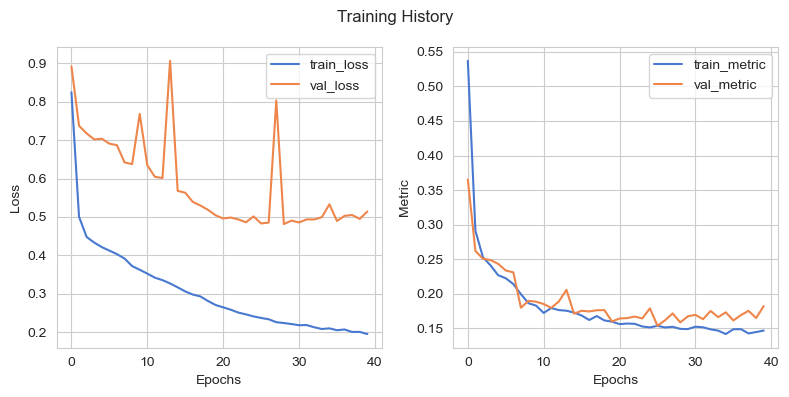

Number of epochs:  40
Training time:     11.2667s
Training loss:     0.1957
Training metric:   0.1465
Validation loss:   0.5144
Validation metric: 0.1819


100%|██████████| 12/12 [00:00<00:00, 742.53it/s]

Loss on test set:  0.16354085304577587


In [6]:
from gas_data_prediction.utils import train, plot_predictions
# train the model
history.update(
            *train(MODEL, train_loader, val_loader, optimizer,
                loss_func=nn.MSELoss(),
                metric_func=nn.L1Loss(),
                num_epochs=num_epochs,
                device=device,
                verbose=1)
            )
history.plot()
history.summary()
print("Loss on test set: ", MODEL.evaluate(test_loader,device=device))

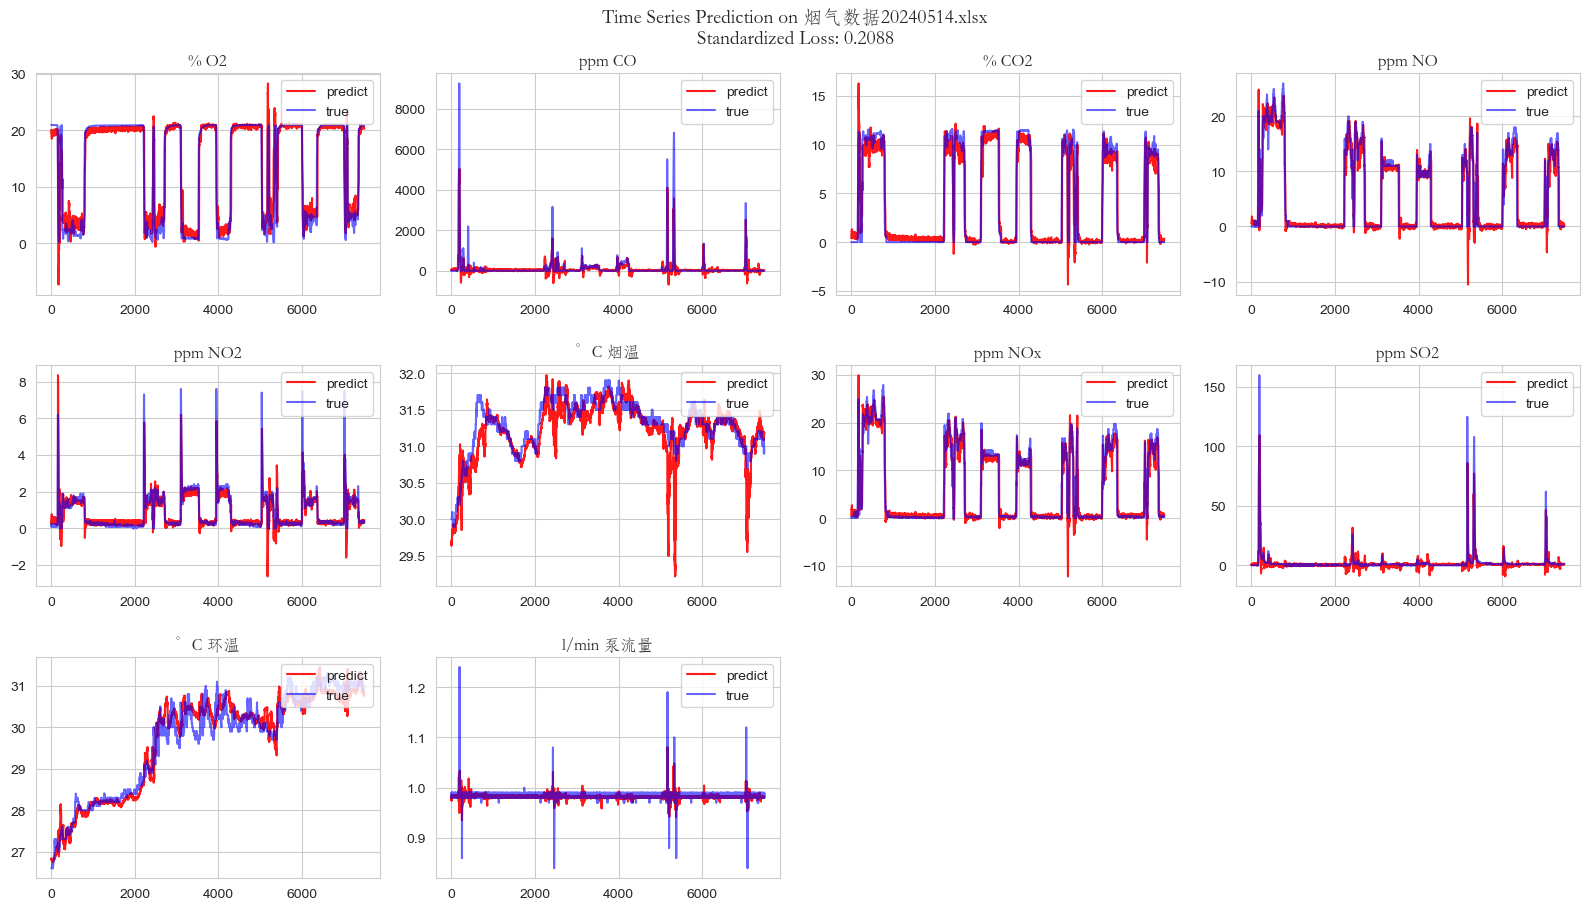

In [8]:
plot_predictions(MODEL, X_grouped, Y_grouped, var_names, data_paths,
                    iii=2,
                    figsize=(16,12),
                    device='cuda',
                    var_mean=var_mean,
                    var_std_dev=var_std_dev,
                    residual_plot=False,
                    )

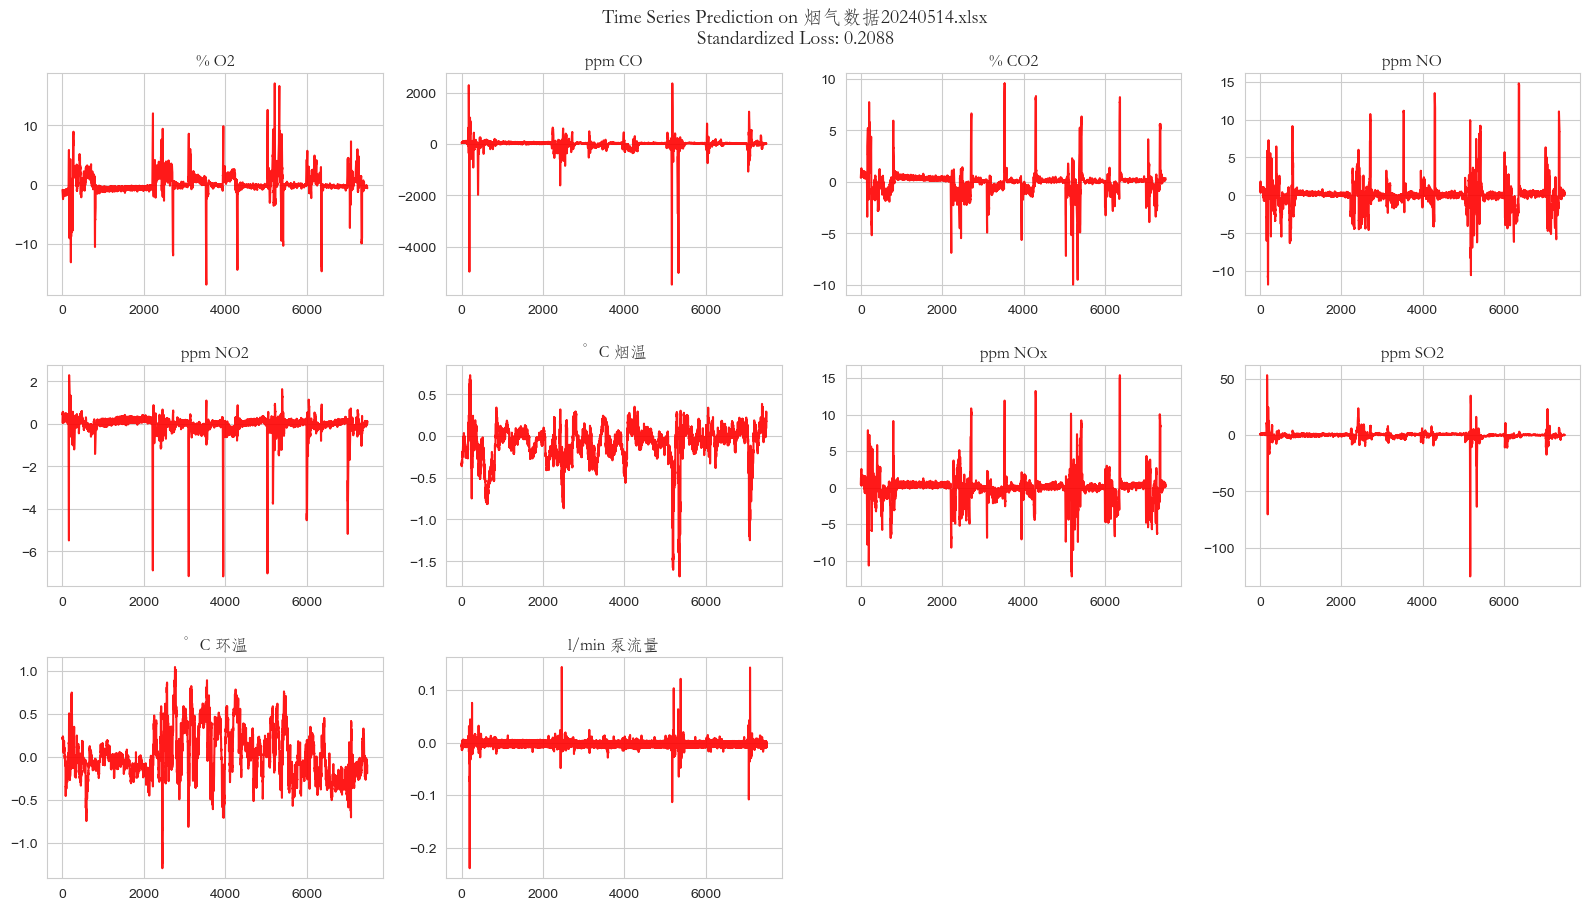

In [7]:
plot_predictions(MODEL, X_grouped, Y_grouped, var_names, data_paths,
                    iii=2,
                    figsize=(16,12),
                    device='cuda',
                    var_mean=var_mean,
                    var_std_dev=var_std_dev,
                    residual_plot=True,
                    )